PROJECT CODE:

Steps taken for data preperation:
1) Dataset explanation.Ridge regression is a technique used to eliminate multicollinearity in data models.
2)Importing dataset in python.
3)checking for outliers.then doing outlier treatment accordingly.
4)checking for null values.
5)checking for categorical variables.Then creating dummy variables for it.
6)deleting columns which will have zero to no contribution in the analysis. 
7)studying the correalation analysis of the columns and deleting the columns accordingly.

I have selected 3 models Multi Linear Regression, Ridge Regression and Lasso Regression.
multi linear regression-it is being selected because in our quantitative dataset,We have more number of independent variables and single dependent variable.
lasso regression-       Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage.
                        The lasso procedure encourages simple, sparse models .
Ridge Regression- Ridge regression is a technique used over regression models to eliminate multicollinearity in data models,to avoid overfitting.
                  


In [645]:
import pandas as pd                              #imporing libraries
import numpy as np 
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


MULTI LINIEAR REGRESSION

In [646]:
df=pd.read_excel(r'C:\Users\sidhu\OneDrive\Desktop\onlytable.xlsx',sheet_name='onlytable') # importing table in notebook

In [647]:
df.head()

,S. NO,RPM,FR,AGS,UP,Temp values
0,1,500,10,260,0,16.5
1,2,500,10,100,0,11.9
2,3,700,15,180,25,15.8
3,4,800,15,180,75,12.8
4,5,900,15,340,0,26.2


In [648]:
df

,S. NO,RPM,FR,AGS,UP,Temp values
0,1,500,10,260,0,16.5
1,2,500,10,100,0,11.9
2,3,700,15,180,25,15.8
3,4,800,15,180,75,12.8
4,5,900,15,340,0,26.2
...,...,...,...,...,...,...
95,96,2300,15,260,75,26.2
96,97,2300,25,420,100,28.2
97,98,2400,25,260,25,35.8
98,99,2400,35,180,75,25.2


In [649]:
del df['S. NO']

splitting the data

In [650]:
x=df.drop("Temp values",axis=1) # dividing table in dependent table and independent table
y=df['Temp values']

In [651]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)   # fitting in model

LinearRegression()

In [652]:
from sklearn.model_selection import train_test_split        #dividing the dataset in test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [653]:
y_test

26    33.4
86    31.0
2     15.8
55    20.1
75    38.4
93    32.8
16    29.1
73    21.3
54    19.2
95    26.2
53    20.8
92    16.1
78    28.0
13    25.4
7     25.4
30    23.2
22    28.8
24    18.7
33    15.4
8     23.7
43    21.1
62    23.6
3     12.8
71    21.6
45    32.0
48    22.9
6     18.0
99    16.4
82    39.8
76    27.2
Name: Temp values, dtype: float64

In [654]:
y_pred=ml.predict(x_test)

In [655]:
y_pred

array([32.63716705, 33.26776131, 19.63117364, 20.42298121, 39.3270062 ,
       32.9323827 , 26.71895419, 22.34031319, 21.39302931, 26.866844  ,
       20.98960865, 20.29749124, 27.16631708, 26.49259515, 25.01558608,
       27.60460362, 26.91330076, 20.54754283, 17.19965854, 22.89058402,
       21.65955131, 23.13637819, 14.95324175, 23.6537082 , 30.51216499,
       21.7056437 , 17.16357083, 24.757384  , 38.04434371, 25.93917742])

In [656]:
ml.predict([[500,10,260,0],[500,10,100,0]])

C:\Users\sidhu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.66440716, 17.78288044])

In [657]:
df

,RPM,FR,AGS,UP,Temp values
0,500,10,260,0,16.5
1,500,10,100,0,11.9
2,700,15,180,25,15.8
3,800,15,180,75,12.8
4,900,15,340,0,26.2
...,...,...,...,...,...
95,2300,15,260,75,26.2
96,2300,25,420,100,28.2
97,2400,25,260,25,35.8
98,2400,35,180,75,25.2


In [658]:
from sklearn.metrics import r2_score

In [659]:
q=r2_score(y_test,y_pred)
r2_score_MLR=q
print(r2_score_MLR)

0.8720024620161145


In [660]:
MAE_MLR=(np.absolute(y_test-y_pred)).mean()
MAE_MLR

1.736456294407739

In [662]:
from sklearn.metrics import mean_squared_error

In [663]:
MSE_MLR = np.square(np.subtract(y_test,y_pred)).mean()
MSE_MLR

5.71960696187645

In [696]:
RMSE_MLR=np.sqrt(MSE_MLR)
RMSE_MLR

2.391569978461105

Text(0.5, 1.0, 'actual vs predicted')

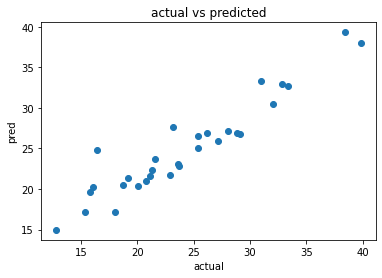

In [664]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('pred')
plt.title("actual vs predicted")

In [665]:
print(df.corr()) # correlation matrix of columns

                  RPM        FR       AGS        UP  Temp values
RPM          1.000000  0.142965 -0.160122  0.199347     0.391494
FR           0.142965  1.000000 -0.070627  0.086400     0.251216
AGS         -0.160122 -0.070627  1.000000 -0.058233     0.494843
UP           0.199347  0.086400 -0.058233  1.000000    -0.499761
Temp values  0.391494  0.251216  0.494843 -0.499761     1.000000


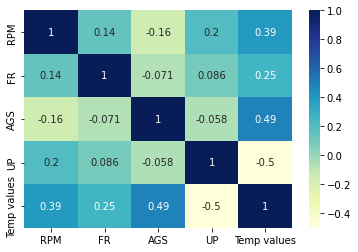

In [666]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  # heatmap of correlation between columns

RIDGE REGRESSION

In [667]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())


In [668]:
ridge=Ridge(0.9,normalize=False)        #Fitting the data in Ridge Regession model 
ridge.fit(x_train,y_train)              
y_pred = ridge.predict(x_test)

C:\Users\sidhu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [669]:
y_pred.reshape(-1, 1)

array([[32.63727656],
       [33.26733343],
       [19.63133114],
       [20.42324311],
       [39.32653419],
       [32.93214762],
       [26.71874844],
       [22.34017654],
       [21.39289317],
       [26.86706285],
       [20.98949863],
       [20.29758779],
       [27.16619509],
       [26.49273525],
       [25.01575289],
       [27.60452332],
       [26.91326162],
       [20.54743306],
       [17.19971604],
       [22.8907656 ],
       [21.65922112],
       [23.13634968],
       [14.9534808 ],
       [23.65397336],
       [30.51228927],
       [21.70571229],
       [17.16380865],
       [24.75709288],
       [38.04406501],
       [25.93920418]])

In [670]:
from sklearn import preprocessing

In [671]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [672]:
x_train_s=scaler.transform(x_train)

In [673]:
x_test_s=scaler.transform(x_test)

In [674]:
from sklearn.linear_model import Ridge

In [675]:
lm_r=Ridge(alpha=0.5)          #Fitting in the model by taking lambda as 0.5
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [676]:
r=r2_score(y_test,lm_r.predict(x_test_s))
r2_score_ridge=r
r2_score_ridge 

0.8705904070302215

In [677]:
MSE_ridge = np.square(np.subtract(y_test,y_pred)).mean()


In [678]:
from sklearn.metrics import mean_squared_error

In [679]:
MSE_ridge

5.719463943558995

In [697]:
RMSE_ridge=np.sqrt(MSE_ridge)
RMSE_ridge

2.3915400777655798

In [681]:
MAE_ridge=(np.absolute(y_test-y_pred)).mean()
MAE_ridge

1.7364185011386477

Lasso Regression

In [682]:
from sklearn.linear_model import Lasso

In [683]:
lm_l=Lasso(alpha=0.5)
lm_l.fit(x_train_s,y_train)
y_pred=lm_l.predict(x_test_s)


s=r2_score(y_test,y_pred)
r2_score_lasso=s
r2_score_lasso

0.8102034997326012

In [684]:
MSE_lasso = np.square(np.subtract(y_test,y_pred)).mean()

In [685]:
MSE_lasso

8.481111444548795

In [698]:
RMSE_lasso=np.sqrt(MSE_lasso)

In [700]:
RMSE_lasso

2.9122347852720933

In [688]:
MAE_lasso=(np.absolute(y_test-y_pred)).mean()

In [689]:
MAE_lasso

2.2661210293716594

In [690]:
import seaborn as sns

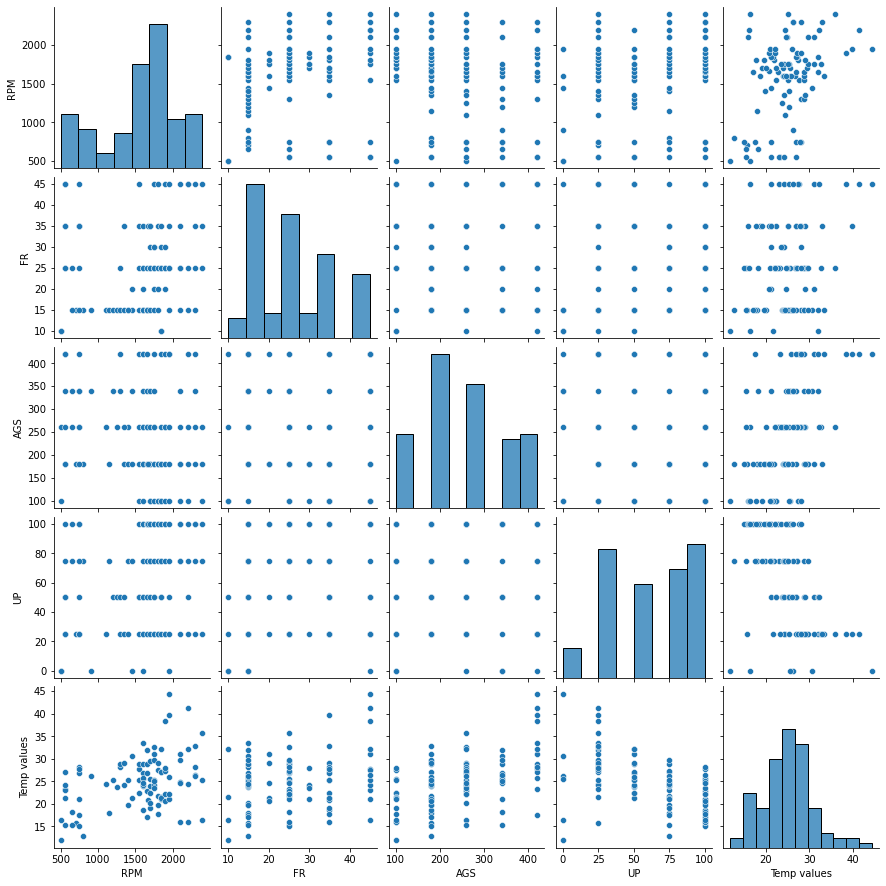

In [691]:
sns.pairplot(df)

In [692]:
df 

,RPM,FR,AGS,UP,Temp values
0,500,10,260,0,16.5
1,500,10,100,0,11.9
2,700,15,180,25,15.8
3,800,15,180,75,12.8
4,900,15,340,0,26.2
...,...,...,...,...,...
95,2300,15,260,75,26.2
96,2300,25,420,100,28.2
97,2400,25,260,25,35.8
98,2400,35,180,75,25.2


In [693]:
# table in
!pip install tabulate

In [694]:
from tabulate import tabulate

In [701]:
mydata=[['MLR',r2_score_MLR,RMSE_MLR,MSE_MLR,MAE_MLR],
       ['Ridge',r2_score_ridge,RMSE_ridge,MSE_ridge,MAE_ridge],
       ['Lasso',r2_score_lasso,RMSE_lasso,MSE_lasso,MAE_lasso]]

head=['MOdel Name','r2_score ','RMSE ','MSE ','MAE ']
print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------------+-------------+---------+---------+---------+
| MOdel Name   |   r2_score  |   RMSE  |    MSE  |    MAE  |
+==============+=============+=========+=========+=========+
| MLR          |    0.872002 | 2.39157 | 5.71961 | 1.73646 |
+--------------+-------------+---------+---------+---------+
| Ridge        |    0.87059  | 2.39154 | 5.71946 | 1.73642 |
+--------------+-------------+---------+---------+---------+
| Lasso        |    0.810203 | 2.91223 | 8.48111 | 2.26612 |
+--------------+-------------+---------+---------+---------+
